#IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

scores = []
names = ["Post-Pruning", "Pre-Pruning"]

/kaggle/input/iris-flower-dataset/IRIS.csv


In [ ]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
labels = list(df["species"].unique())
labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
X = df.drop("species", axis=1)
y = df["species"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Post Pruning Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

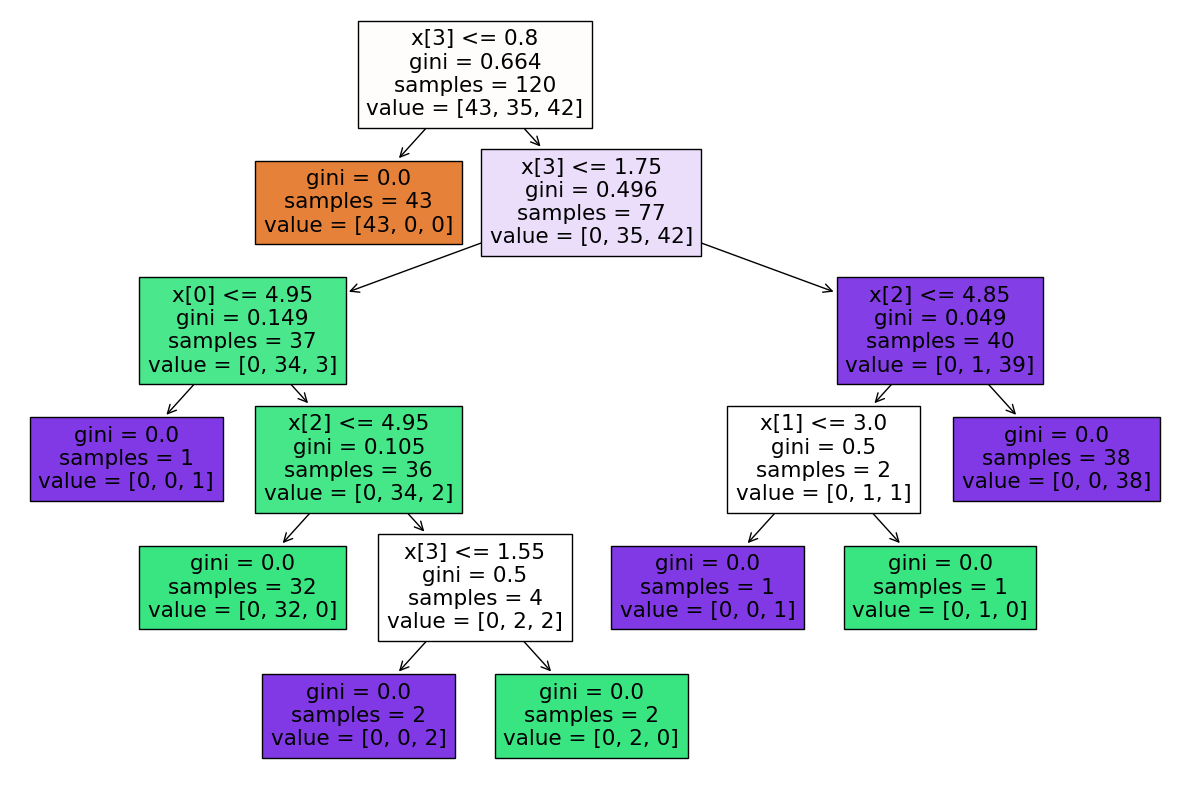

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled=True)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

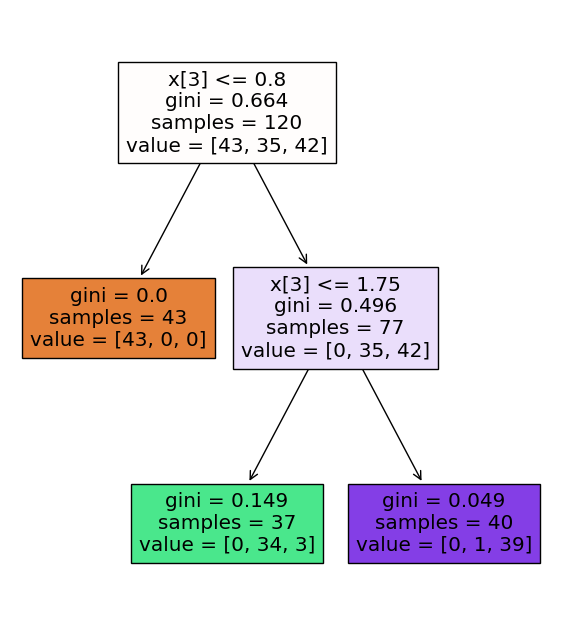

In [ ]:
plt.figure(figsize=(7, 8))
tree.plot_tree(dt, filled=True)
plt.show()

Post Pruning Score:  0.9333333333333333


<Axes: >

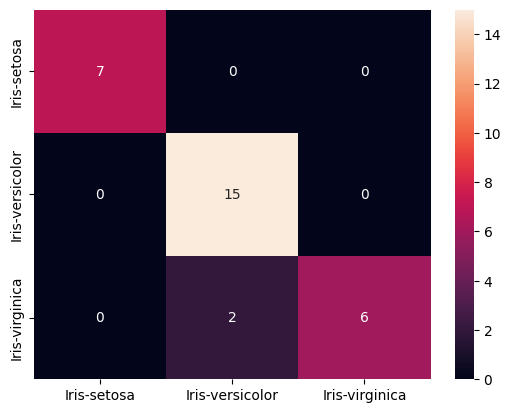

In [ ]:
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Post Pruning Score: ", score)
scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

# Pre Pruning

In [ ]:
dt = DecisionTreeClassifier()
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [2,3,4,5,6,7,8,9,10],
    "min_samples_split": [2,3,4,5,6,7,7,8,9,10],
    "max_features": ["auto", "sqrt", "log2"],
}

gscv = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print("Best params: ", gscv.best_params_)
print("Best score: ", gscv.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'random'}
Best score:  0.975


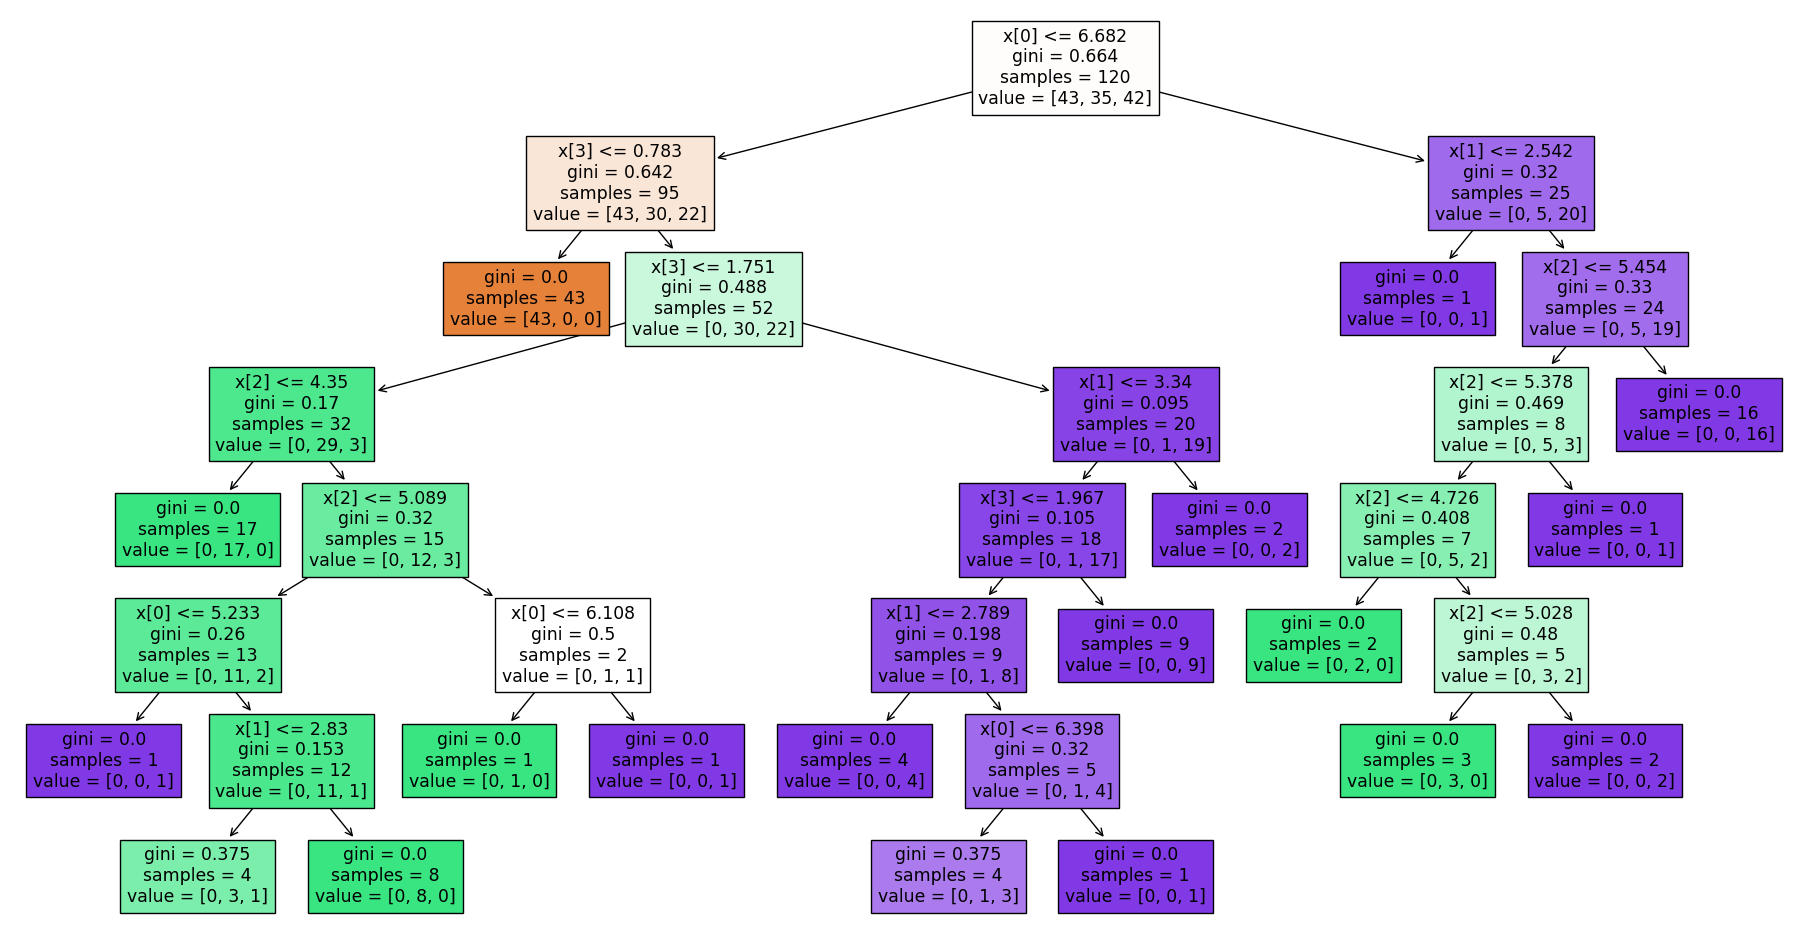

In [ ]:
from sklearn import tree
dt = gscv.best_estimator_
plt.figure(figsize=(23,12))
tree.plot_tree(dt, filled=True)
plt.show()

Pre-Pruning Score:  0.9666666666666667


<Axes: >

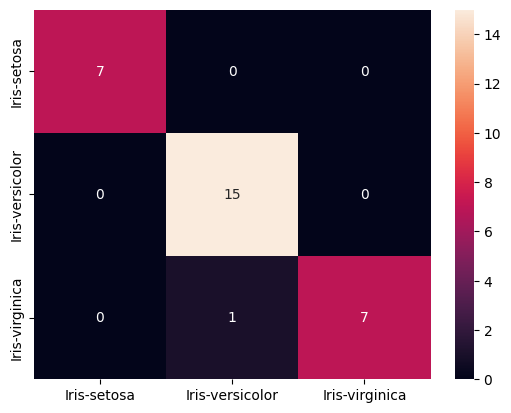

In [ ]:
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Pre-Pruning Score: ", score)
scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

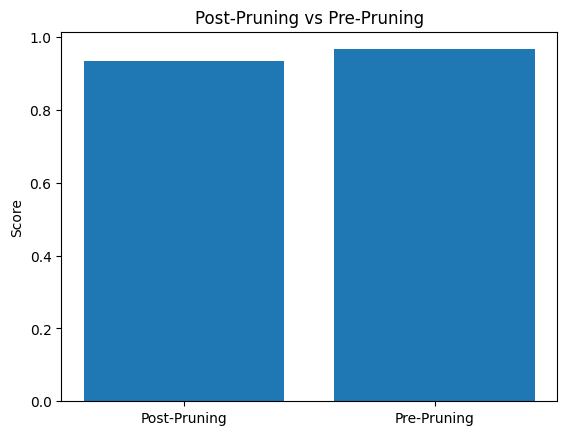

In [ ]:
plt.title("Post-Pruning vs Pre-Pruning")
plt.bar(names, scores)
plt.ylabel("Score")
plt.show()